## 3 - Feature Engineering

The process of determining the best representation of your data for a particular problem.

### Data in scikit-learn

Data in scikit-learn is assumed to be stored as a
**two-dimensional array**, of shape `[n_samples, n_features]`.
- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be Boolean or
  discrete-valued in some cases.
  

*https://github.com/amueller/scipy-2016-sklearnnotebooks/03 Data Representation for Machine Learning*

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

np.random.seed(12)

In [2]:
df = pd.read_csv('data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
y = df.Survived
X = df.drop(['Survived'], axis=1)

# Check that our columns are correctly updated
assert 'Survived' in y.name
assert 'Survived' not in X.columns

X = X.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

### Is there any missing data?

Yes, Age, Cabin and Embarked have missing data.

In [4]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=10)

# Set these to None so I don't accidentally use this data before determining my final model
x_test = None
y_test = None

### Cabin 
Cabin has a lot of missing data points, so rather than guessing, let's remove it form the dataset

In [6]:
x_train = x_train.drop(['Cabin'], axis=1)
x_val = x_val.drop(['Cabin'], axis=1)

### Embarked

Mapping embarked to a number imples an ordering where C < S < Q. The classifier will use this ordering when making decisions about how the data is structred which we don't want. To avoid this, create indicator (dummy) variables for each state of embarked.

In [7]:
x_train["Embarked"] = x_train["Embarked"].fillna("S")
x_val["Embarked"] = x_val["Embarked"].fillna("S")

In [8]:
pd.get_dummies(x_train['Embarked'], prefix='Embarked').head(10)

,Embarked_C,Embarked_Q,Embarked_S
57,1.0,0.0,0.0
717,0.0,0.0,1.0
431,0.0,0.0,1.0
633,0.0,0.0,1.0
163,0.0,0.0,1.0
864,0.0,0.0,1.0
467,0.0,0.0,1.0
785,0.0,0.0,1.0
244,1.0,0.0,0.0
197,0.0,0.0,1.0


In [9]:
x_train = pd.concat([x_train, pd.get_dummies(x_train['Embarked'], prefix='Embarked')], axis=1)
x_val = pd.concat([x_val, pd.get_dummies(x_val['Embarked'], prefix='Embarked')], axis=1)

In [10]:
x_train = x_train.drop(['Embarked'], axis=1)
x_val = x_val.drop(['Embarked'], axis=1)

In [11]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
57,3,male,28.5,0,0,7.2292,1.0,0.0,0.0
717,2,female,27.0,0,0,10.5000,0.0,0.0,1.0
431,3,female,NaN,1,0,16.1000,0.0,0.0,1.0
633,1,male,NaN,0,0,0.0000,0.0,0.0,1.0
163,3,male,17.0,0,0,8.6625,0.0,0.0,1.0


### Sex

Since Sex is already binary we don't need to create dummy variables for it.

In [12]:
x_train['Sex'] = x_train['Sex'].map({'female':0, 'male':1})
x_val['Sex'] = x_val['Sex'].map({'female':0, 'male':1})

### Age

Initially we filled in missing age values with the mean.

In [13]:
x_train_age_prior = x_train['Age'].copy()
x_val_age_prior = x_val['Age'].copy()

# copy not strictly necessary here because slicing automatically returns a value

In [14]:
x_train_age_prior.isnull().sum()

135

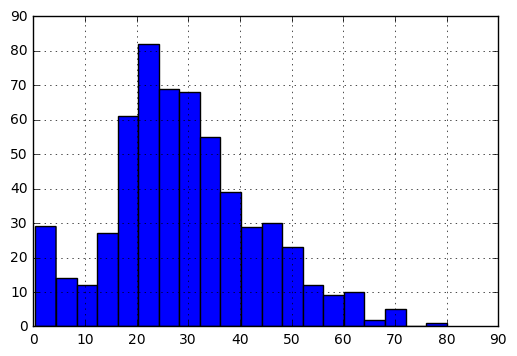

In [15]:
x_train_age_prior.hist(bins=20)

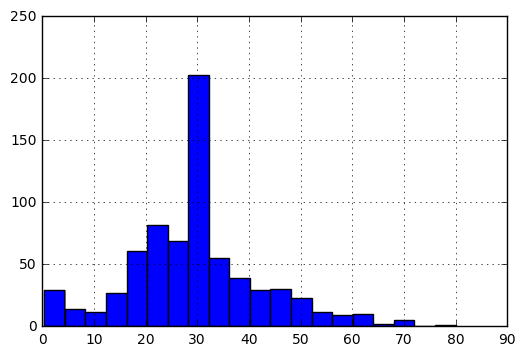

In [16]:
x_train_age_prior.fillna(x_train_age_prior.mean()).hist(bins=20)

This warps our age distribution. Instead we can sample random values from the age distribution and use those for missing values.

In [17]:
a = [ max(0, np.random.normal(x_train.Age.mean(), x_train.Age.std())) for n in range(0, len(X)) ]
x_train.loc[:, 'age_filler'] = pd.Series(a)
x_train.loc[x_train.Age.isnull(), 'Age'] = x_train.loc[x_train.Age.isnull(), 'age_filler']

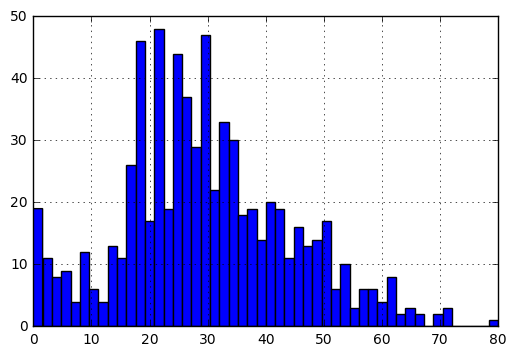

In [18]:
x_train.Age.hist(bins=50)

In [19]:
x_train_age_prior.describe()

/Users/pymike/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    577.000000
mean      29.668544
std       14.427861
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

In [20]:
x_train.Age.describe()

count    712.000000
mean      29.561113
std       14.617294
min        0.000000
25%       20.000000
50%       28.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 57 to 265
Data columns (total 10 columns):
Pclass        712 non-null int64
Sex           712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
Embarked_C    712 non-null float64
Embarked_Q    712 non-null float64
Embarked_S    712 non-null float64
age_filler    712 non-null float64
dtypes: float64(6), int64(4)
memory usage: 61.2 KB


In [22]:
a = [ max(0, np.random.normal(x_val.Age.mean(), x_val.Age.std())) for n in range(0, len(X)) ]
x_val.loc[:, 'age_filler'] = pd.Series(a)
x_val.loc[x_val.Age.isnull(), 'Age'] = x_val.loc[x_val.Age.isnull(), 'age_filler']

In [23]:
x_train = x_train.drop(['age_filler'], axis=1)
x_val = x_val.drop(['age_filler'], axis=1)

### Family

Instead of having two columns regarding family members we can combine these into a binary variable called Family.
- SibSp: Number of Siblings/Spouses Aboard
- Parch: Number of Parents/Children Aboard

In [24]:
x_train.loc[:, 'Family'] =  x_train["Parch"] + x_train["SibSp"]
x_train.loc[x_train['Family'] > 0, 'Family'] = 1
x_train.loc[x_train['Family'] == 0, 'Family'] = 0

x_val.loc[:, 'Family'] =  x_val["Parch"] + x_val["SibSp"]
x_val.loc[x_val['Family'] > 0, 'Family'] = 1
x_val.loc[x_val['Family'] == 0, 'Family'] = 0

x_train = x_train.drop(['SibSp'], axis=1)
x_val = x_val.drop(['SibSp'], axis=1)

x_train = x_train.drop(['Parch'], axis=1)
x_val = x_val.drop(['Parch'], axis=1)

In [25]:
x_train.head()

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Family
57,3,1,28.500000,7.2292,1.0,0.0,0.0,0
717,2,0,27.000000,10.5000,0.0,0.0,1.0,0
431,3,0,26.961765,16.1000,0.0,0.0,1.0,1
633,1,1,22.654939,0.0000,0.0,0.0,1.0,0
163,3,1,17.000000,8.6625,0.0,0.0,1.0,0


## Train the model

In [26]:
from sklearn import tree, ensemble

model = tree.DecisionTreeClassifier(max_depth=5, random_state=10)

model = model.fit(x_train, y_train)

In [27]:
model.score(x_val, y_val)

0.8089887640449438

In [28]:
model2 = ensemble.RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=10)

model2 = model2.fit(x_train, y_train)

In [29]:
model2.score(x_val, y_val)

0.8202247191011236